# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [34]:
# ## 1. Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import joblib

import warnings
warnings.filterwarnings('ignore')

print("Library berhasil di-import.")

Library berhasil di-import.


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```


In [35]:
# ## 2. Memuat Dataset

# Gunakan code ini untuk melakukan load data secara otomatis
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

print("Dataset berhasil dimuat.")

Dataset berhasil dimuat.


In [36]:
# Tampilkan 5 baris pertama dengan function head.

display(df.head())

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [37]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [38]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [39]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [40]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [41]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [42]:
# Mengecek dataset menggunakan isnull().sum()

df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [43]:


# Mengecek dataset menggunakan duplicated().sum()
print(f"\nJumlah data duplikat: {df.duplicated().sum()}")
# ## Menangani Nilai NaN (PENTING!)

print("Jumlah NaN sebelum ditangani:")
print(df.isnull().sum())

# Menghapus semua baris yang mengandung setidaknya satu nilai NaN
df = df.dropna()

print("\nJumlah NaN setelah ditangani (dengan dropna):")
print(df.isnull().sum())

print(f"\nJumlah baris data setelah dropna: {len(df)}")


Jumlah data duplikat: 21
Jumlah NaN sebelum ditangani:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

Jumlah NaN setelah ditangani (dengan dropna):
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              

In [44]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_columns_to_drop = ['TransactionID', 'AccountID', 'MerchantID', 'DeviceID', 'IPAddress']
existing_id_columns = [col for col in id_columns_to_drop if col in df.columns]

print(f"Kolom ID yang akan dihapus: {existing_id_columns}")

# Lakukan drop dan simpan kembali ke df
df = df.drop(columns=existing_id_columns)

print("\nKolom setelah drop ID:")
print(df.columns.tolist())

Kolom ID yang akan dihapus: ['TransactionID', 'AccountID', 'MerchantID', 'DeviceID']

Kolom setelah drop ID:
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


In [45]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
le = LabelEncoder()

print(f"Fitur kategorikal yang akan di-encode: {categorical_features}")

for col in categorical_features:
    df[col] = le.fit_transform(df[col]) # Simpan kembali ke df

print("\nDataFrame setelah Encoding:")
df.head()

Fitur kategorikal yang akan di-encode: ['TransactionDate', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']

DataFrame setelah Encoding:


,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,591,1,36,184,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1031,1,15,81,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1097,1,23,338,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,712,1,33,297,2,26.0,3,25.0,1.0,8569.06,163
5,92.15,550,1,28,59,0,18.0,3,172.0,1.0,781.68,13


In [46]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Kita ambil semua kolom karena semua sudah numerik (kecuali jika ada yg mau dikecualikan)
numerical_features_to_scale = df.columns.tolist()
scaler = MinMaxScaler()

print(f"Fitur yang akan di-scale: {numerical_features_to_scale}")

df[numerical_features_to_scale] = scaler.fit_transform(df[numerical_features_to_scale]) # Simpan kembali ke df

print("\nDataFrame setelah Scaling:")
df.head()

Fitur yang akan di-scale: ['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']

DataFrame setelah Scaling:


,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007554,0.276945,1.0,0.857143,0.314530,0.0,0.838710,0.0,0.244828,0.0,0.336790,0.292479
1,0.205368,0.483130,1.0,0.357143,0.138462,0.0,0.806452,0.0,0.451724,0.0,0.918049,0.534819
2,0.068840,0.514058,1.0,0.547619,0.577778,1.0,0.016129,1.0,0.158621,0.0,0.068578,0.114206
3,0.100636,0.333646,1.0,0.785714,0.507692,1.0,0.129032,1.0,0.051724,0.0,0.569170,0.454039
5,0.050192,0.257732,1.0,0.666667,0.100855,0.0,0.000000,1.0,0.558621,0.0,0.045677,0.036212


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [47]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'IP Address',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

In [48]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [49]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [50]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [51]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [52]:
# ## Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

# Pastikan 'df' di sini adalah DataFrame Anda yang sudah di-scaling & encode
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.162628,0.500007,0.774583,0.506858,0.502439,0.488868,0.430038,0.501237,0.379322,0.029105,0.335235,0.499211
std,0.158779,0.288958,0.417954,0.292963,0.286291,0.403714,0.288017,0.378391,0.244704,0.143879,0.263511,0.285808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045157,0.250586,1.000000,0.261905,0.252991,0.000000,0.145161,0.000000,0.182759,0.000000,0.092634,0.256267
50%,0.116402,0.499766,1.000000,0.500000,0.499145,0.500000,0.435484,0.333333,0.355172,0.000000,0.303824,0.500000
75%,0.226514,0.750351,1.000000,0.761905,0.755556,1.000000,0.661290,1.000000,0.524138,0.000000,0.509777,0.749304
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


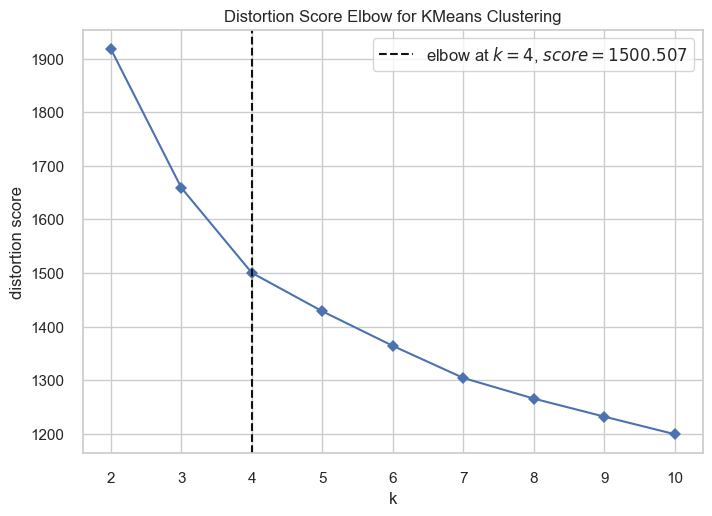

Jumlah cluster (K) optimal yang disarankan: 4


In [53]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model_elbow = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model_elbow, k=(2, 11), metric='distortion', timings=False)

visualizer.fit(df) # <-- SEKARANG SEHARUSNYA TIDAK ERROR KARENA df SUDAH BERSIH
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"Jumlah cluster (K) optimal yang disarankan: {optimal_k}")

In [54]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Pastikan 'optimal_k' sudah ada
if 'optimal_k' not in locals():
    print("Nilai 'optimal_k' belum ada. Jalankan cell Elbow dulu.")
    optimal_k = 4 # Default jika gagal, ganti sesuai kebutuhan
else:
    # Buat model K-Means
    model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

    # Latih model K-Means
    model_kmeans.fit(df)

    print(f"Model K-Means dengan K={optimal_k} berhasil dilatih.")

Model K-Means dengan K=4 berhasil dilatih.


Jalankan cell code ini untuk menyimpan model kamu.

In [55]:
# ## Menyimpan model menggunakan joblib
import joblib

# Pastikan 'model_kmeans' adalah nama variabel model Anda
joblib.dump(model_kmeans, "model_clustering.h5")

print("Model berhasil disimpan sebagai 'model_clustering.h5'")

Model berhasil disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [56]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [57]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [58]:
# Membangun model menggunakan PCA.

In [59]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [60]:
# ## 5. Interpretasi Cluster
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.

# Tambahkan label cluster ke df yang sudah di-scale/encode
df['Cluster'] = model_kmeans.labels_

# Tampilkan describe berdasarkan cluster
df.groupby('Cluster').describe().T

Cluster                                 0           1           2           3
TransactionAmount       count  486.000000  728.000000  449.000000  493.000000
                        mean     0.168618    0.158868    0.170146    0.155430
                        std      0.158963    0.153240    0.173372    0.152602
                        min      0.000967    0.000104    0.000000    0.000033
                        25%      0.044350    0.047166    0.045014    0.042971
...                                   ...         ...         ...         ...
PreviousTransactionDate min      0.000000    0.000000    0.002786    0.002786
                        25%      0.235376    0.261838    0.264624    0.245125
                        50%      0.484680    0.504178    0.501393    0.509749
                        75%      0.749304    0.746518    0.718663    0.774373
                        max      1.000000    0.997214    0.997214    1.000000

[96 rows x 4 columns]

Cluster 1: (Nasabah dengan Pengeluaran dan Saldo Akun Tinggi):
- **Rata-rata (mean) Transaction Amount:** 0.1493 (min: 0.0009, max: 1.000)
- **Rata-rata (mean) Customer Age:** 0.5158 (min: 0.1774, max: 0.8387)
- **Rata-rata (mean) Account Balance:** 0.5816 (min: 0.0057, max: 1.000)

**Analisis:**
Cluster ini mencakup pelanggan dengan jumlah transaksi rata-rata yang lebih rendah, tetapi saldo akun mereka cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki tingkat pengeluaran yang lebih tinggi tetapi memiliki berbagai jenis transaksi yang beragam. Mereka mungkin lebih berfokus pada produk yang meningkatkan daya beli mereka atau menawarkan akses yang lebih besar ke kredit atau investasi. Dalam hal ini, produk yang dapat disarankan termasuk produk tabungan atau produk yang memberikan fasilitas kredit dengan bunga rendah.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [61]:
# ## 6. Mengeksport Data
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Tambahkan kolom Cluster jika belum ada
if 'Cluster' not in df.columns:
    df['Cluster'] = model_kmeans.labels_

# Ganti nama 'Cluster' menjadi 'Target'
df = df.rename(columns={'Cluster': 'Target'})

print("Kolom 'Target' ditambahkan/diubah:")
df.head()

Kolom 'Target' ditambahkan/diubah:


,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007554,0.276945,1.0,0.857143,0.314530,0.0,0.838710,0.0,0.244828,0.0,0.336790,0.292479,3
1,0.205368,0.483130,1.0,0.357143,0.138462,0.0,0.806452,0.0,0.451724,0.0,0.918049,0.534819,3
2,0.068840,0.514058,1.0,0.547619,0.577778,1.0,0.016129,1.0,0.158621,0.0,0.068578,0.114206,2
3,0.100636,0.333646,1.0,0.785714,0.507692,1.0,0.129032,1.0,0.051724,0.0,0.569170,0.454039,2
5,0.050192,0.257732,1.0,0.666667,0.100855,0.0,0.000000,1.0,0.558621,0.0,0.045677,0.036212,2


In [62]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

print("Data berhasil disimpan sebagai 'data_clustering.csv'")

Data berhasil disimpan sebagai 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [63]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.


In [64]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
